In [2]:
from qiskit_ibm_provider import IBMProvider

In [3]:
provider = IBMProvider(instance="ibm-q-education/uni-antioquia-2/quantum-alg")
provider

<IBMProvider>

In [11]:
provider.backends()

[<IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibmq_manila')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('ibm_oslo')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('simulator_stabilizer')>]

In [12]:
provider.backends(simulator=False, operational=True)

[<IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibmq_manila')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('ibm_oslo')>,
 <IBMBackend('ibm_perth')>]

In [13]:
from qiskit_ibm_provider import least_busy

small_devices = provider.backends(min_num_qubits=5, simulator=False, operational=True)
backend = least_busy(small_devices)
print(backend)

<IBMBackend('ibmq_manila')>


In [14]:
backend.status().to_dict()

{'backend_name': 'ibmq_manila',
 'backend_version': '',
 'operational': True,
 'pending_jobs': 0,
 'status_msg': 'active'}

In [19]:
import numpy as np
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import T1

In [17]:
qubit0_t1 = backend.properties().t1(0)
delays = np.arange(1e-6, 3 * qubit0_t1, 3e-5)
exp = T1(qubit=0, delays=delays)

In [18]:
exp.set_transpile_options(scheduling_method='asap')

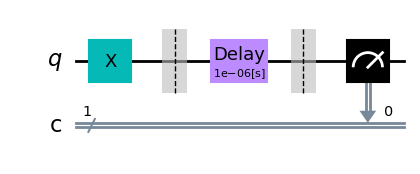

In [19]:
exp.circuits()[0].draw(output='mpl')

In [20]:
exp_data = exp.run(backend=backend)

In [40]:
print(exp_data.job_status())
print(exp_data.analysis_status())

JobStatus.DONE
AnalysisStatus.DONE


In [20]:
from qiskit_experiments.library.characterization.t2hahn import T2Hahn

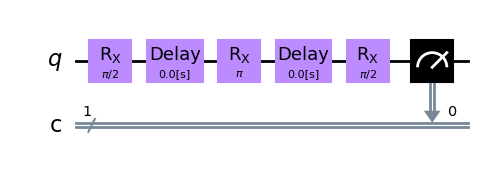

In [25]:
qubit = 0
conversion_factor = 1e-6 # our delay will be in micro-sec
delays = list(range(0, 50, 1) )
delays = [float(_) * conversion_factor for _ in delays]
number_of_echoes = 1

# Create a T2Hahn experiment. Print the first circuit as an example
exp1 = T2Hahn(qubit=qubit, delays=delays, num_echoes=number_of_echoes)
exp1.circuits()[0].draw('mpl')

In [28]:
backend.configuration().to_dict()['max_shots']

100000

In [29]:
exp1.analysis.set_options(p0=None, plot=True)
expdata1 = exp1.run(backend=backend, shots=2000)

In [30]:
print(expdata1.job_status())
print(expdata1.analysis_status())

JobStatus.QUEUED
AnalysisStatus.QUEUED


In [4]:
backend2 = provider.get_backend("ibm_oslo")

In [34]:
qubit0_t1_2 = backend2.properties().t1(0)
delays2 = np.arange(1e-6, 3 * qubit0_t1_2, 3e-5)
exp_2 = T1(qubit=0, delays=delays2)

exp_2.set_transpile_options(scheduling_method='asap')

exp_2.circuits()[0].draw(output='mpl')

exp_2_data = exp_2.run(backend=backend2)

In [35]:
print(exp_2_data.job_status())
print(exp_2_data.analysis_status())

JobStatus.QUEUED
AnalysisStatus.QUEUED


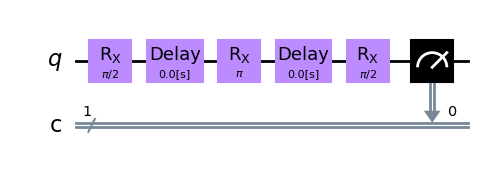

In [36]:
qubit = 0
conversion_factor = 1e-6 # our delay will be in micro-sec
delays = list(range(0, 50, 1) )
delays = [float(_) * conversion_factor for _ in delays]
number_of_echoes = 1

# Create a T2Hahn experiment. Print the first circuit as an example
exp2 = T2Hahn(qubit=qubit, delays=delays, num_echoes=number_of_echoes)
exp2.circuits()[0].draw('mpl')

In [37]:
exp2.analysis.set_options(p0=None, plot=True)
expdata2 = exp2.run(backend=backend2, shots=2000)

In [38]:
print(expdata2.job_status())
print(expdata2.analysis_status())

JobStatus.QUEUED
AnalysisStatus.QUEUED


In [15]:
props = backend.properties()


def describe_qubit(qubit, properties):
    """Print a string describing some of reported properties of the given qubit."""

    print(
        f"Qubit {qubit} has a \n"
        f"  - T1 time of {properties.t1(qubit)} microseconds\n"
        f"  - T2 time of {properties.t2(qubit)} microseconds\n"
    )


describe_qubit(0, props)

Qubit 0 has a 
  - T1 time of 0.00014558740448264294 microseconds
  - T2 time of 9.900059163588522e-05 microseconds



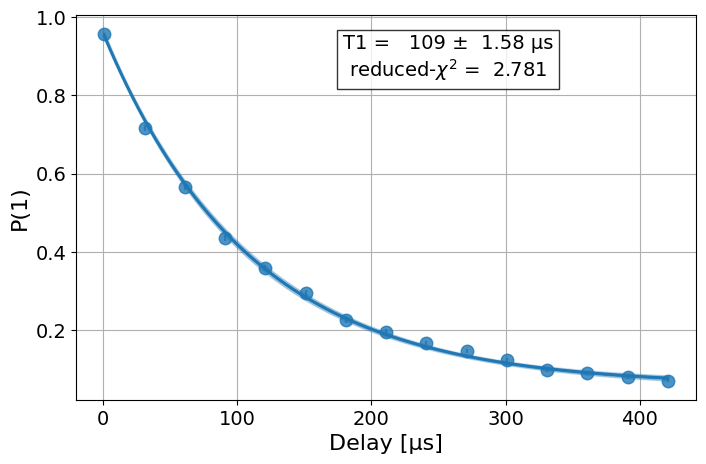

In [41]:
display(exp_data.figure(0))

In [42]:
for result in exp_data.analysis_results():
    print(result)

AnalysisResult
- name: @Parameters_T1Analysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_exp_decay(x) = amp * exp(-x/tau) + base
 - success: True
 - number of function evals: 10
 - degree of freedom: 12
 - chi-square: 33.36924365975993
 - reduced chi-square: 2.780770304979994
 - Akaike info crit.: 17.993766391932184
 - Bayesian info crit.: 20.117916995238815
 - init params:
  * amp = 0.8857785553611598
  * tau = 0.00016291850515624866
  * base = 0.07035741064733816
 - fit params:
  * amp = 0.9024614126804834 ± 0.003960539634298163
  * tau = 0.00010906049899738637 ± 1.580360982205754e-06
  * base = 0.05812801125686681 ± 0.003037546815781918
 - correlations:
  * (tau, base) = -0.8177682717017655
  * (amp, base) = -0.614108434671768
  * (amp, tau) = 0.3337912532747431
- quality: good
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: T1
- value: 0.0001091+/-0.0000016
- χ²: 2.780770304979994
- quality: good
- extra: <1 items

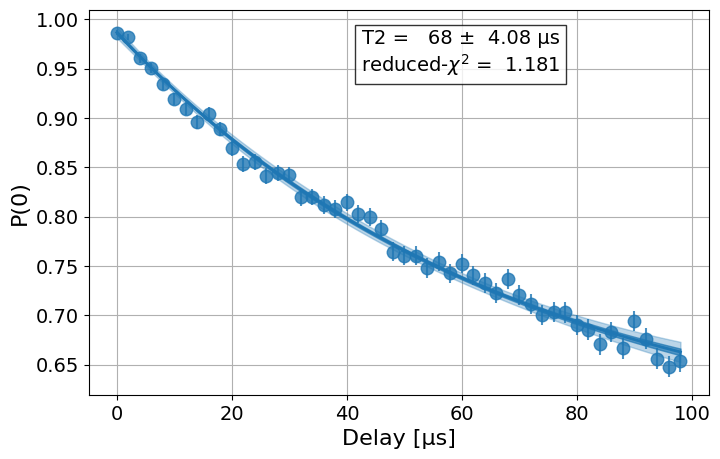

In [43]:
display(expdata1.figure(0))

In [44]:
for result in expdata1.analysis_results():
    print(result)

AnalysisResult
- name: @Parameters_T2HahnAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_exp_decay(x) = amp * exp(-x/tau) + base
 - success: True
 - number of function evals: 10
 - degree of freedom: 47
 - chi-square: 55.52067934527617
 - reduced chi-square: 1.181291049899493
 - Akaike info crit.: 11.236627337079186
 - Bayesian info crit.: 16.972696353363624
 - init params:
  * amp = 0.33833083458270874
  * tau = 0.00024860742044101363
  * base = 0.6479260369815092
 - fit params:
  * amp = 0.4240792232775018 ± 0.014172838259352593
  * tau = 6.803344633989922e-05 ± 4.078181535814245e-06
  * base = 0.5624115152147511 ± 0.014836725990228585
 - correlations:
  * (amp, base) = -0.9934810551375995
  * (tau, base) = -0.9790736954899333
  * (amp, tau) = 0.9598461745549022
- quality: good
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: T2
- value: (6.8+/-0.4)e-05
- χ²: 1.181291049899493
- quality: good
- extra: <1 items>
-

In [7]:
for ran_job in provider.backend.jobs(limit=5):
    print(str(ran_job.job_id()) + " " + str(ran_job.status()))

cghnimqnfrtkkhumseq0 JobStatus.DONE
cghnhcglhtje4kg6doe0 JobStatus.DONE
cghndvbd0r8bj54063q0 JobStatus.DONE
cghn9d8lhtje4kg62k4g JobStatus.DONE


In [8]:
job_exp2 = provider.backend.retrieve_job("cghnhcglhtje4kg6doe0")
job_expdata2 = provider.backend.retrieve_job("cghnimqnfrtkkhumseq0")

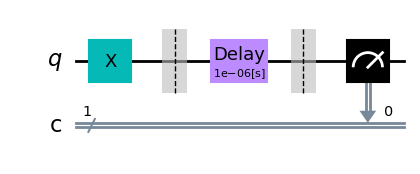

In [21]:
qubit0_t1_2 = backend2.properties().t1(0)
delays2 = np.arange(1e-6, 3 * qubit0_t1_2, 3e-5)
exp_2 = T1(qubit=0, delays=delays2)

exp_2.set_transpile_options(scheduling_method='asap')

exp_2.circuits()[0].draw(output='mpl')

In [22]:
from qiskit_experiments.framework import ExperimentData
from qiskit_ibm_provider import IBMProvider

In [23]:
exp_2_data = ExperimentData(experiment=exp_2)

In [25]:
exp_2_data.add_data([job_exp2.result()])
exp_2.analysis.run(exp_2_data)

exp_2_data.block_for_results()

ExperimentData(T1, 6ead9132-ecc2-4bbc-bc53-57b242d497aa, job_ids=['circuit-runner_cghnhcglhtje4kg6doe0_fd0b_0'], metadata=<3 items>, figure_names=['T1_Fig-0_Exp-6ead9132.svg'])

In [33]:
props2 = backend2.properties()


def describe_qubit(qubit, properties):
    """Print a string describing some of reported properties of the given qubit."""

    print(
        f"Qubit {qubit} has a \n"
        f"  - T1 time of {properties.t1(qubit)} microseconds\n"
        f"  - T2 time of {properties.t2(qubit)} microseconds\n"
    )


describe_qubit(0, props2)

Qubit 0 has a 
  - T1 time of 0.00022132645916027533 microseconds
  - T2 time of 8.385273875579772e-05 microseconds



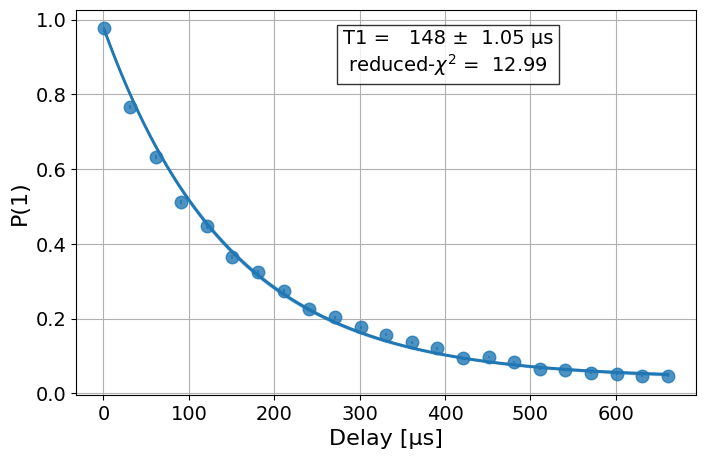

In [26]:
display(exp_2_data.figure(0))

In [28]:
for result in exp_2_data.analysis_results():
    print(result)

AnalysisResult
- name: @Parameters_T1Analysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_exp_decay(x) = amp * exp(-x/tau) + base
 - success: True
 - number of function evals: 10
 - degree of freedom: 20
 - chi-square: 259.8734027061463
 - reduced chi-square: 12.993670135307315
 - Akaike info crit.: 61.76810882825658
 - Bayesian info crit.: 65.17459147604403
 - init params:
  * amp = 0.9322669332666834
  * tau = 0.00021553125393686064
  * base = 0.045613596600849786
 - fit params:
  * amp = 0.9378194660669774 ± 0.0018853515766900557
  * tau = 0.00014787304489702655 ± 1.0497543452225467e-06
  * base = 0.04039722939023592 ± 0.0012599271399078348
 - correlations:
  * (tau, base) = -0.7603579397894444
  * (amp, base) = -0.5388538715296836
  * (amp, tau) = 0.2345420795838739
- quality: bad
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: T1
- value: 0.0001479+/-0.0000010
- χ²: 12.993670135307315
- quality: bad
- extra: <1 it

In [29]:
qubit = 0
conversion_factor = 1e-6 # our delay will be in micro-sec
delays = list(range(0, 50, 1) )
delays = [float(_) * conversion_factor for _ in delays]
number_of_echoes = 1

# Create a T2Hahn experiment. Print the first circuit as an example
exp2 = T2Hahn(qubit=qubit, delays=delays, num_echoes=number_of_echoes)
exp2.circuits()[0].draw('mpl')
exp2.analysis.set_options(p0=None, plot=True)

In [30]:
expdata2 = ExperimentData(experiment=exp2)
expdata2.add_data([job_expdata2.result()])
exp2.analysis.run(expdata2)

expdata2.block_for_results()

ExperimentData(T2Hahn, 4e2e820e-d95a-4f55-9724-e7ce7246004b, job_ids=['circuit-runner_cghnimqnfrtkkhumseq0_cbb8_0'], metadata=<3 items>, figure_names=['T2Hahn_Fig-0_Exp-4e2e820e.svg'])

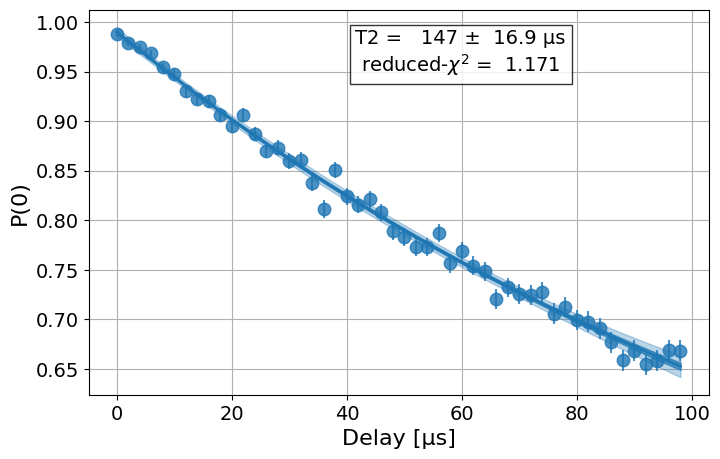

In [31]:
display(expdata2.figure(0))

In [32]:
for result in expdata2.analysis_results():
    print(result)

AnalysisResult
- name: @Parameters_T2HahnAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_exp_decay(x) = amp * exp(-x/tau) + base
 - success: True
 - number of function evals: 12
 - degree of freedom: 47
 - chi-square: 55.01493227305679
 - reduced chi-square: 1.1705304738948255
 - Akaike info crit.: 10.779081941487465
 - Bayesian info crit.: 16.5151509577719
 - init params:
  * amp = 0.33283358320839584
  * tau = 0.00023545614295972762
  * base = 0.6549225387306347
 - fit params:
  * amp = 0.6921033974083456 ± 0.06036532696339248
  * tau = 0.0001468594081021318 ± 1.690236535612035e-05
  * base = 0.2976682974957089 ± 0.061165952461936374
 - correlations:
  * (amp, base) = -0.9997291005565758
  * (tau, base) = -0.9959803947391763
  * (amp, tau) = 0.9944304703924997
- quality: bad
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: T2
- value: 0.000147+/-0.000017
- χ²: 1.1705304738948255
- quality: bad
- extra: <1 items>
